# Vamos ahora con un ensamble de arboles de decisión

## Importamos librerias y funciones necesarias

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.tree import plot_tree

In [2]:
from preprocessing import obtener_datasets
from preprocessing import aplicar_preparacion
from preprocessing import conversion_numerica
from preprocessing import plot_roc_curves
from preprocessing import graficar_matriz_confusion

# Ahora obtengo el set de entrenamiento y realizo el primer preproccesing

In [3]:
df, df_holdout = obtener_datasets()

X_df, y_df = aplicar_preparacion(df)


# acá solo convierto simplemente a numerico.. primer preprocessing!
X_df = conversion_numerica(X_df) 

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.2, random_state=30,stratify=y_df)

# Realizo el entrenamiento con el primer preprocesamiento

Naturalemnte, utilizo gridsearch para la busqueda optima de hiperparámetros

In [5]:
parametros = {"max_depth":np.arange(1,10,1),"min_samples_leaf":np.arange(10,100,10)}
clf = RandomForestClassifier()
cv = StratifiedKFold(n_splits=10,shuffle= True, random_state= 10).split(X_train, y_train)
clf = GridSearchCV(clf, parametros, scoring='roc_auc', cv=cv, n_jobs = -1, verbose=4)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

Fitting 10 folds for each of 81 candidates, totalling 810 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:   18.1s
[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:   48.4s
[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 605 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 810 out of 810 | elapsed:  4.9min finished


In [6]:
print(f"Best score: {clf.best_score_}")
print(f"Best params {clf.best_params_}")

Best score: 0.9103236728496069
Best params {'max_depth': 9, 'min_samples_leaf': 10}


AUC-ROC score sobre test:  0.9120375791873879
AUC-ROC score sobre train:  0.9163698091654822
Accuracy sobre test:  0.8490710885920467
Los mejores hiperpametros elegidos:  {'max_depth': 9, 'min_samples_leaf': 10}
              precision    recall  f1-score   support

  Bajo valor       0.95      0.86      0.91      5452
  Alto valor       0.52      0.78      0.63      1061

    accuracy                           0.85      6513
   macro avg       0.74      0.82      0.77      6513
weighted avg       0.88      0.85      0.86      6513



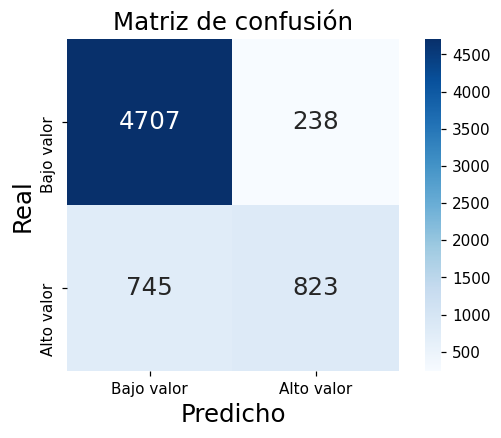

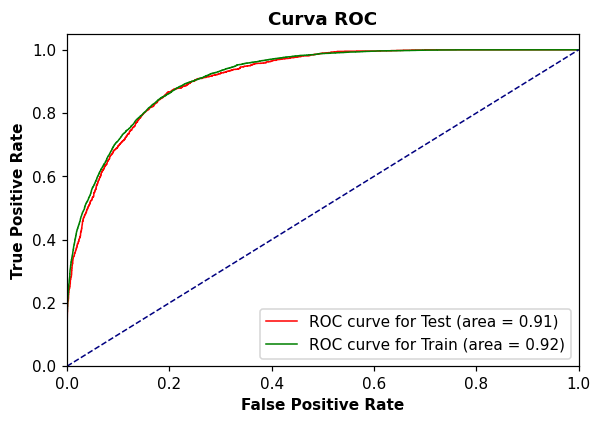

In [7]:
print("AUC-ROC score sobre test: ", "%0.16f"  % roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1]))
print("AUC-ROC score sobre train: ", "%0.16f"  % roc_auc_score(y_train, clf.predict_proba(X_train)[:, 1]))
print("Accuracy sobre test: ", "%0.16f"  % accuracy_score(y_pred, y_test))
print("Los mejores hiperpametros elegidos: ", clf.best_params_)
print(classification_report(y_pred, y_test, target_names=["Bajo valor", "Alto valor"]))
graficar_matriz_confusion(y_test, y_pred)
plot_roc_curves(clf, X_test, y_test, X_train, y_train)


# por chusmear veo la importancia de features

In [23]:
sorted(list(zip(X_train.columns, clf.best_estimator_.feature_importances_)), key=lambda x: -x[1])

[('estado_marital_matrimonio_civil', 0.24401088426429993),
 ('suma_declarada_bolsa_argentina', 0.19004843853765277),
 ('anios_estudiados', 0.12860651406400586),
 ('educacion_alcanzada', 0.08781294697421056),
 ('estado_marital_sin_matrimonio', 0.07065491199540738),
 ('edad', 0.06283833325272824),
 ('horas_trabajo_registradas', 0.050235863592653134),
 ('trabajo_directivo_gerente', 0.032062150535422045),
 ('genero_mujer', 0.02483413180006886),
 ('rol_familiar_registrado_sin_familia', 0.02227349590287102),
 ('trabajo_profesional_especializado', 0.02035026397706459),
 ('rol_familiar_registrado_soltero_a', 0.014888443102374527),
 ('rol_familiar_registrado_con_hijos', 0.01416874999158611),
 ('trabajo_otros', 0.00641084827794699),
 ('categoria_de_trabajo_responsable_inscripto', 0.004731062345075717),
 ('categoria_de_trabajo_monotibutista', 0.0032974452570146183),
 ('trabajo_sector_primario', 0.003166349409893342),
 ('trabajo_reparador', 0.0019670059258996165),
 ('trabajo_limpiador', 0.00194975